**Digit Classification with Softmax**

<h2>Objectives</h2>

<ul>
    <li>Download the Training and Validation MNIST Digit Images</li>
    <li>Create a Softmax Classifier using PyTorch</li>
    <li>Create a Criterion, Optimizer, and Data Loaders</li>
    <li>Create a Data Loader and set the Batch Size</li>
    <li>Train a Model</li>
    <li>Analyze Results and Model</li>
</ul> 


<h2>Table of Contents</h2>
<p>We will use a single-layer Softmax Classifier to classify handwritten digits from the MNIST database.</p>

<ul>
    <li><a href="#Makeup_Data">Make some Data</a></li>
    <li><a href="#Classifier">Build a Softmax Classifier</a></li>
    <li><a href="#Model">Define Softmax, Criterion Function, Optimizer, and Train the Model</a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>



In [1]:
!pip3 install torch torchvision torchaudio

In [2]:
!conda install -y torchvision

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
import torch
import torch.nn as nn
#To transform data
import torchvision.transforms as transforms
#To get the digit dataset
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import numpy as np

Using the following function to plot out the parameters of the Softmax function: In this case, for 10 classes. As MNIST generally have class between 0 to 9.

In [4]:
#Function for plot parameters
def PlotParameters(model):
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2,5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i>10:
            #<set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))
            ax.imshow(W[i,:].view(28,28),vmin=w_min, vmax=w_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()

In [5]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28,28), cmap='gray')
    plt.title('y= '+str(data_sample[1]))

**Making some data**

Load the training dataset by setting the parameters train to True and convert it to a tensor by placing a transform object in the argument transform. caz tensor runs directly from GPU:

In [6]:
#Create and print the training dataset
train_dataset = dsets.MNIST(root='./data', train = True, download=True, transform=transforms.ToTensor())
print("Training dataset:\n", train_dataset)

Training dataset:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


Load the <em>testing</em> dataset and convert it to a tensor by placing a transform object in the argument <code>transform</code>.


In [7]:
#Create and print the training dataset
test_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())
print("Testing dataset:\n", test_dataset)

Testing dataset:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


First image and Label


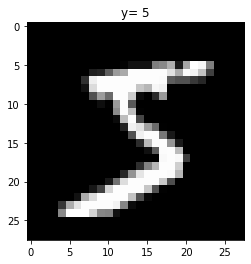

In [8]:
#Print the first image and label
print("First image and Label")
show_data(train_dataset[0])

Each element in the rectangular tensor corresponds to a number which represents a pixel intensity, as demonstrated by the following image:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.32_image_values.png" width="550" alt="MNIST elements">


Values are inverted, Black represents white.

In [9]:
#Print the label of the fourth element:
print("The label: ", train_dataset[3][1])

The label:  1


The image: 


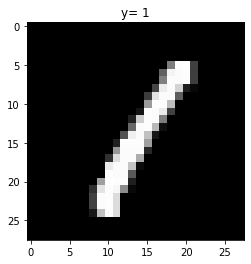

In [10]:
#Plot the image
print("The image: ")
show_data(train_dataset[3])

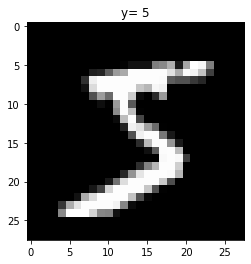

In [11]:
show_data(train_dataset[0])

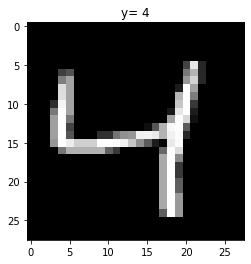

In [12]:
show_data(train_dataset[2])

**Build Softmax Classifer**

Softmax classifier class:

In [13]:
#Inherits nn.Module which is the base class for all neural networks.
class SoftMax(nn.Module):
    #Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        #Creates a layer of given input size and output size
        self.linear = nn.Linear(input_size, output_size)
        
    #Prediction
    def forward(self, x):
        #Runs the x value through the single layers defines above
        z = self.linear(x)
        return z

The Softmax function requires vector inputs. Vector shape is 28x28

In [14]:
#Print the shape of the training dataset
train_dataset[0][0].shape

torch.Size([1, 28, 28])

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.3.2image_to_vector.gif" width="550" alt="Flattern Image">


The size of the flattened tensor is now 784.

In [15]:
#Set input size and output size
input_dim = 28*28
output_dim = 10

**Definr the Softmax Classifier, Criterion Function, Optimizer, and Train the Model**

In [16]:
#Create the model
#Input dimension 28*18 which is a image converted to a tensor
#Output dimension is 10  because there are 10 possible digits that the image can be
model = SoftMax(input_dim, output_dim)
print("Print the model:\n", model)

Print the model:
 SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [17]:
#Print the parameters
print('W: ', list(model.parameters())[0].size())
print('b: ', list(model.parameters())[1].size())

W:  torch.Size([10, 784])
b:  torch.Size([10])


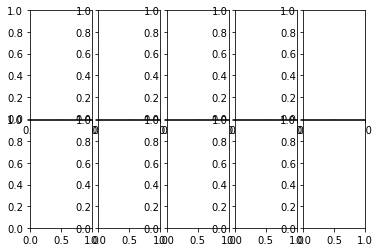

In [18]:
#Plot the model parameters for each class
#Since the model has not been trained yet the parameters look random

PlotParameters(model)

In [19]:
#First we get the X value of the image
X = train_dataset[0][0]
#We can see the shape is 1 by 28 by 28, we need it to be flattened to 1 by 28*28(784)
print(X.shape)

torch.Size([1, 28, 28])


In [20]:
X=X.view(-1,28*28)
print(X.shape)

torch.Size([1, 784])


In [21]:
#Now we can make a prediction, each class has a value, and the higher it is the more confident the model is about the perticular degit.
model(X)

tensor([[ 0.0128,  0.0747,  0.0929, -0.0069,  0.0006, -0.1231, -0.0178,  0.3853,
         -0.2432, -0.2709]], grad_fn=<AddmmBackward0>)

In [22]:
predicted_class = torch.argmax(model(X))
print(predicted_class) 

tensor(7)


Define the learning rate, Optimizer, criterion, and data loader:


In [23]:
learning_rate =0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#The criterion will measure the loss between the prediction and actual label values.
criterion = nn.CrossEntropyLoss()
#Creating a training data loader so we can set the batch size.
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=5000)

**How Cross Entropy Loss uses SoftMax**


We have X which is the X values of the first image and actual which is the the digit class the image belongs to. The output model_output is the value the model assigns to each class for that image.

Output:  tensor([[ 0.0128,  0.0747,  0.0929, -0.0069,  0.0006, -0.1231, -0.0178,  0.3853,
         -0.2432, -0.2709]], grad_fn=<AddmmBackward0>)
Actual:  tensor([5])


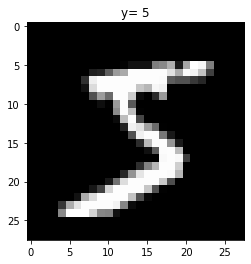

In [24]:
model_output = model(X)
actual = torch.tensor([train_dataset[0][1]]) #The [ ] (square brackets) are there to make the label look like a list before converting it into a PyTorch tensor. This is helpful because it gives the tensor a shape of [1], which means "a batch of size 1."

show_data(train_dataset[0])
print("Output: ", model_output)
print("Actual: ", actual)

In [25]:
#Criterion will take this value an return a loss
criterion(model_output, actual)

tensor(2.4321, grad_fn=<NllLossBackward0>)

Cross Entropy Loss takes probabilities and we can see that model_output are not probabilities, this is where softmax comes in

In [26]:
softmax = nn.Softmax(dim=1)
probability = softmax(model_output)
print(probability)

tensor([[0.1006, 0.1071, 0.1090, 0.0987, 0.0994, 0.0878, 0.0976, 0.1461, 0.0779,
         0.0758]], grad_fn=<SoftmaxBackward0>)


int(probability)
Now that we have probabilities, we can just calculate the negative log of the probability of the class that this image belongs to. The image belongs to the target class so we calculate the negative log of the probability at the target index.

In [27]:
-1*torch.log(probability[0][actual])

tensor([2.4321], grad_fn=<MulBackward0>)

**Train**

In [29]:
# Number of times we train our model useing the training data
n_epochs = 10
# Lists to keep track of loss and accuracy
loss_list = []
accuracy_list = []
# Size of the validation data
N_test = len(test_dataset)

# Function to train the model based on number of epochs
def train_model(n_epochs):
    # Loops n_epochs times
    for epoch in range(n_epochs):
        # For each batch in the train loader
        for x, y in train_loader:
            # Resets the calculated gradient value, this must be done each time as it accumulates if we do not reset
            optimizer.zero_grad()
            # Makes a prediction based on the image tensor
            z = model(x.view(-1, 28 * 28))
            # Calculates loss between the model output and actual class
            loss = criterion(z, y)
            # Calculates the gradient value with respect to each weight and bias
            loss.backward()
            # Updates the weight and bias according to calculated gradient value
            optimizer.step()
        
        # Each epoch we check how the model performs with data it has not seen which is the validation data, we are not training here
        correct = 0
        # For each batch in the validation loader
        for x_test, y_test in test_loader:
            # Makes prediction based on image tensor
            z = model(x_test.view(-1, 28 * 28))
            # Finds the class with the higest output
            _, yhat = torch.max(z.data, 1)
            # Checks if the prediction matches the actual class and increments correct if it does
            correct += (yhat == y_test).sum().item()
        # Calculates the accuracy by dividing correct by size of validation dataset
        accuracy = correct / N_test
        # Keeps track loss
        loss_list.append(loss.data)
        # Keeps track of the accuracy
        accuracy_list.append(accuracy)

# Function call
train_model(n_epochs)

**Analyze Results**

Plot the loss and accuracy on the validation data:

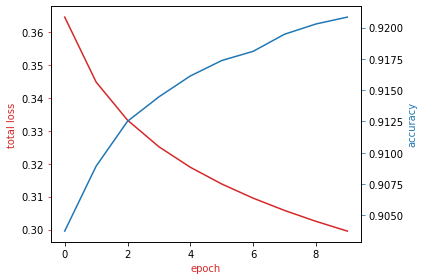

In [30]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

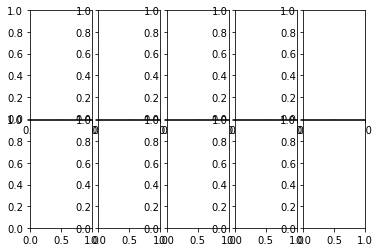

In [31]:
PlotParameters(model)

We Plot the first five misclassified samples and the probability of that class.

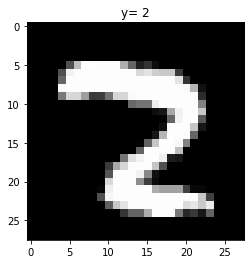

yhat: tensor([7])
probability of class  0.6742246150970459


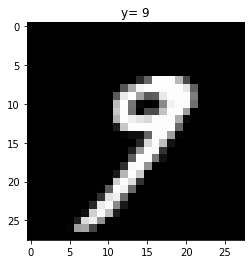

yhat: tensor([7])
probability of class  0.7289236783981323


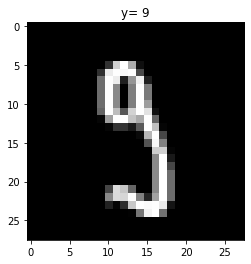

yhat: tensor([5])
probability of class  0.723318874835968


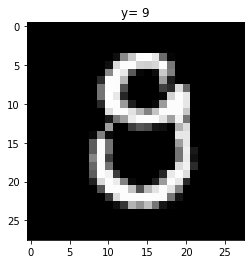

yhat: tensor([8])
probability of class  0.38827136158943176


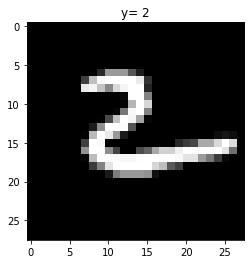

yhat: tensor([6])
probability of class  0.5053849816322327


In [32]:
# Plot the misclassified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in test_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break       

We plot the first five correctly classified samples and the probability of that class. We see the probability is much larger.

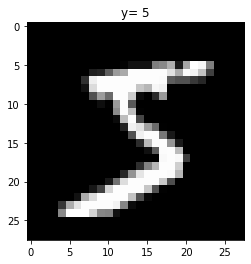

yhat: tensor([5])
probability of class  0.8428446650505066


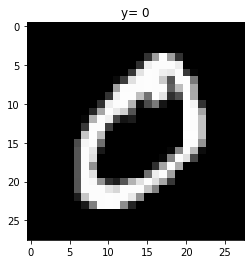

yhat: tensor([0])
probability of class  0.9997411370277405


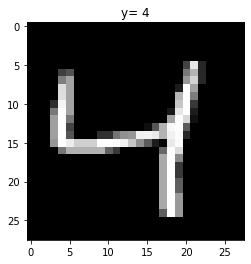

yhat: tensor([4])
probability of class  0.867953896522522


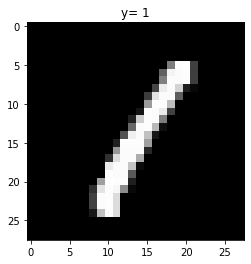

yhat: tensor([1])
probability of class  0.9647096991539001


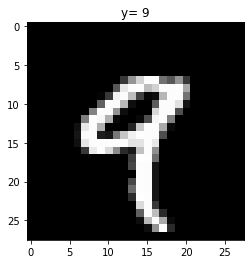

yhat: tensor([9])
probability of class  0.9236522912979126


In [34]:
# Plot the classified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in test_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break  